In [91]:
# Import libraries
import numpy
from pandas import read_table
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Load dataset
filepath = 'Data\SMSSpamCollection.txt'
data = read_csv(filepath, sep='[\t]', names=['class', 'text'], engine='python')

In [60]:
data.shape

(5574, 2)

In [61]:
data.head(20)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [29]:
data.tail(20)

,class,text
5554,ham,Have a safe trip to Nigeria. Wish you happines...
5555,ham,Hahaha..use your brain dear
5556,ham,Well keep in mind I've only got enough gas for...
5557,ham,Yeh. Indians was nice. Tho it did kane me off ...
5558,ham,Yes i have. So that's why u texted. Pshew...mi...
5559,ham,No. I meant the calculation is the same. That ...
5560,ham,"Sorry, I'll call later"
5561,ham,if you aren't here in the next &lt;#&gt; hou...
5562,ham,Anything lor. Juz both of us lor.
5563,ham,Get me out of this dump heap. My mom decided t...


In [30]:
print(data.groupby('class').size())

class
ham     4827
spam     747
dtype: int64


In [31]:
data.isnull().sum()

class    0
text     0
dtype: int64

In [46]:
# Get counts of unique characters
char_counts = {}
for message in data['text']:
        for char in message:
            char_counts[char] = 1 if char not in char_counts.keys() else char_counts[char] + 1
                
print("Number of unique characters: %s" % len(char_counts.values()))
print("\nCounts of unique characters:")
print(sorted(char_counts.items(), key = lambda kv:kv[1]))

Number of unique characters: 116

Counts of unique characters:
[('ú', 1), ('è', 1), ('^', 1), ('»', 1), ('—', 1), ('É', 1), ('ì', 1), ('鈥', 1), ('┾', 1), ('〨', 1), ('“', 2), ('\x91', 2), ('\x93', 2), ('¡', 2), ('~', 3), ('’', 3), ('\x96', 3), ('é', 3), ('\\', 4), ('\x94', 4), ('[', 5), (']', 5), ('<', 6), ('–', 9), ('%', 10), ('_', 15), ('…', 16), ('$', 23), ('>', 31), ('Z', 33), ('|', 36), ('‘', 37), ('@', 38), ('\x92', 39), ('=', 47), ('Ü', 53), ('Q', 73), ('(', 119), ('ü', 120), ('+', 137), ('q', 163), ('#', 287), ('J', 308), ('*', 311), ('X', 319), ('£', 329), ('"', 347), ('V', 367), ('K', 404), ('/', 419), ('z', 472), (')', 499), ('-', 585), ('j', 640), ('F', 651), ('9', 665), (':', 745), (';', 768), ('6', 806), ('3', 852), ('7', 858), ('G', 880), ('B', 894), ('&', 922), ('P', 987), ('4', 1057), ('Y', 1064), ('5', 1073), ('L', 1125), ('U', 1138), ('R', 1154), ('D', 1157), ('M', 1229), ('x', 1298), ('8', 1315), ('W', 1374), ('!', 1397), ('C', 1405), ('H', 1549), ('?', 1550), ('N', 

In [63]:
# Remove stop words and stem
stopwords_list = stopwords.words('english')
ps = PorterStemmer()
cleaned_messages = []
for i in range(0, len(data['text'])):
    message = data['text'][i].lower().split()
    message = [ps.stem(word) for word in message if not word in stopwords_list]
    message = ' '.join(message)
    cleaned_messages.append(message)

In [81]:
# Create bag of words
cv = CountVectorizer(max_features = 8000)
X = cv.fit_transform(cleaned_messages).toarray()

In [82]:
# Encode dependent variable
le = LabelEncoder()
y = le.fit_transform(data['class'])

In [85]:
# Partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [93]:
# Preliminary check of multiple classification models
models = [('LR', LogisticRegression()),
          ('CART', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('NB', GaussianNB()),
          ('LDA', LinearDiscriminantAnalysis()),
          ('SVM', SVC())]
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.979368 (0.004991)
CART: 0.967930 (0.006502)
KNN: 0.910293 (0.006428)
NB: 0.886746 (0.013272)
LDA: 0.910978 (0.050993)
SVM: 0.975781 (0.005738)


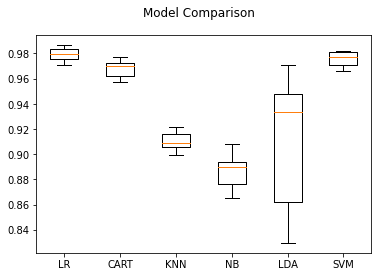

In [94]:
# Compare model results
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()